# Inspecting transfusion.data file
<p><img src="https://assets.datacamp.com/production/project_646/img/blood_donation.png" style="float: right;" alt="A pictogram of a blood bag with blood donation written in it" width="200"></p>
<p>Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to <a href="https://www.webmd.com/a-to-z-guides/blood-transfusion-what-to-know#1">WebMD</a>, "about 5 million Americans need a blood transfusion every year".</p>
<p>Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.</p>
<p>The data is stored in <code>datasets/transfusion.data</code> and it is structured according to RFMTC marketing model (a variation of RFM). We'll explore what that means later in this notebook. First, let's inspect the data.</p>

In [1]:
# Importing Required Library
import scipy.stats as stats
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


C:\Anaconda\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
# Import Data Set
data = pd.read_csv('transfusion.csv')
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
# Check Shape
data.shape

(748, 5)

# Inspecting transfusion DataFrame
<p>Let's briefly return to our discussion of RFM model. RFM stands for Recency, Frequency and Monetary Value and it is commonly used in marketing for identifying your best customers. In our case, our customers are blood donors.</p>
<p>RFMTC is a variation of the RFM model. Below is a description of what each column means in our dataset:</p>
<ul>
        <li>R (Recency - months since the last donation)</li>
        <li>F (Frequency - total number of donation)</li>
        <li>M (Monetary - total blood donated in c.c.)</li>
        <li>T (Time - months since the first donation)</li>
        <li>a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)</li>
</ul>
<p>It looks like every column in our DataFrame has the numeric type, which is exactly what we want when building a machine learning model. Let's verify our hypothesis.</p>

In [4]:
# Check Null Values
data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

#### No Null Values Present..!

In [5]:
# Info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
# Renaming a our target col
data.rename(columns={'whether he/she donated blood in March 2007':'Target'},inplace=True)

In [7]:
# Print out the first 2 rows
data.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Target
0,2,50,12500,98,1
1,0,13,3250,28,1


# Checking target incidence
We want to predict whether or not the same donor will give blood the next time the vehicle comes to campus. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:

        0 - the donor will not give blood

        1 - the donor will give blood
Target incidence is defined as the number of cases of each individual target value in a dataset. That is, how many 0s in the target column compared to how many 1s? Target incidence gives us an idea of how balanced (or imbalanced) is our dataset.

In [8]:
# Print target incidence proportions, rounding output to 3 decimal places
target_incidence = data['Target'].value_counts(normalize=True).round(3)
target_incidence

0    0.762
1    0.238
Name: Target, dtype: float64

##### Target incidence informed us that in our dataset 0s appear 76% of the time and 1 appears 23% of the time.

# Statistical Information About Data Set.

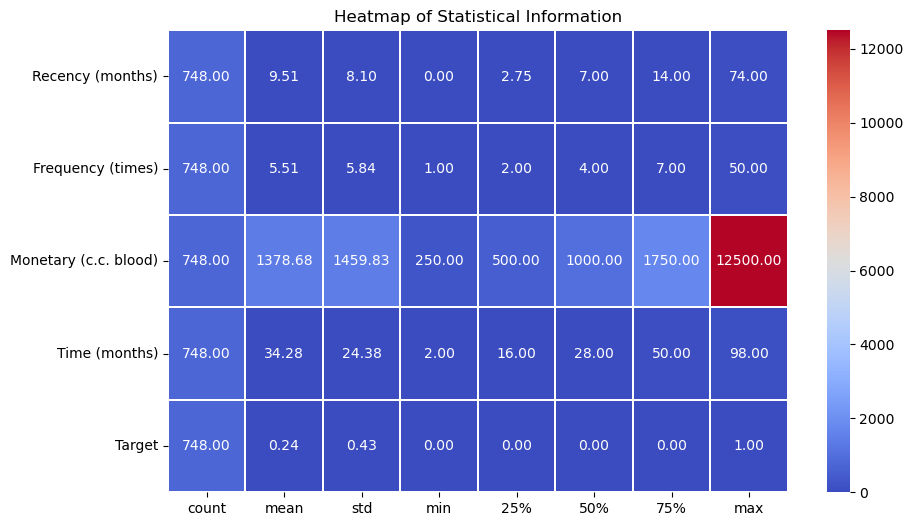

In [9]:
# Transpose the describe() result for better visualization
describe_transposed = data.describe().T

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(describe_transposed, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.3)
plt.title('Heatmap of Statistical Information')
plt.show()


Recency (months):

            Count: 748
            Mean: 9.506684
            Standard Deviation (std): 8.095396
            Minimum (min): 0.0
            25th Percentile (25%): 2.75
            Median (50%): 7.0
            75th Percentile (75%): 14.0
            Maximum (max): 74.0
                
                
Frequency (times):

            Count: 748
            Mean: 5.514706
            Standard Deviation (std): 5.839307
            Minimum (min): 1.0
            25th Percentile (25%): 2.0
            Median (50%): 4.0
            75th Percentile (75%): 7.0
            Maximum (max): 50.0
                
                
Monetary (c.c. blood):

            Count: 748
            Mean: 1378.676471
            Standard Deviation (std): 1459.826781
            Minimum (min): 250.0
            25th Percentile (25%): 500.00
            Median (50%): 1000.0
            75th Percentile (75%): 1750.0
            Maximum (max): 12500.0
                
                
Time (months):

            Count: 748
            Mean: 34.282086
            Standard Deviation (std): 24.376714
            Minimum (min): 2.0
            25th Percentile (25%): 16.00
            Median (50%): 28.0
            75th Percentile (75%): 50.0
            Maximum (max): 98.0
                
                
 Target:

            Count: 748
            Mean: 0.237968
            Standard Deviation (std): 0.426124
            Minimum (min): 0.0
            25th Percentile (25%): 0.00
            Median (50%): 0.0
            75th Percentile (75%): 0.0
            Maximum (max): 1.0

# Skew Values

In [10]:
# Skew Values For Columns 
for i in data.columns:
        skew = data[i].skew()
        print(f"Skewness for column '{i}': {skew}")

Skewness for column 'Recency (months)': 1.8804635327038797
Skewness for column 'Frequency (times)': 3.2112654741848314
Skewness for column 'Monetary (c.c. blood)': 3.2112654741848305
Skewness for column 'Time (months)': 0.7494502906271294
Skewness for column 'Target': 1.2331358118226035


    Recency (months): Skewness = 1.8804635327038797

    The positive skewness indicates that the distribution of values is skewed to the right. In the context of "Recency         (months)," it suggests that there might be a concentration of smaller values with a tail of larger values.
    
    
    Frequency (times): Skewness = 3.2112654741848314
    

    The high positive skewness suggests a significant concentration of smaller values with a long tail of larger values.       This indicates that the distribution is heavily skewed to the right.
    
    
    Monetary (c.c. blood): Skewness = 3.2112654741848305

    The skewness value is the same as the one for "Frequency (times)," indicating a similar distribution pattern. This         might be expected if these two variables are related or if they follow a similar distribution.
    
    
    Time (months): Skewness = 0.7494502906271294

    The positive skewness suggests a distribution that is somewhat skewed to the right but not as strongly as the               "Frequency" and "Monetary" columns. There might be a concentration of smaller values with a tail of larger values.
    
    
    Target: Skewness = 1.2331358118226035

    The positive skewness indicates that the distribution of the "Target" variable is skewed to the right. This suggests       that there might be more instances of lower values with a tail of higher values.


###### The Distribution of Our Data Is Not Normal!

# Ploting The PDF and QQ Plot

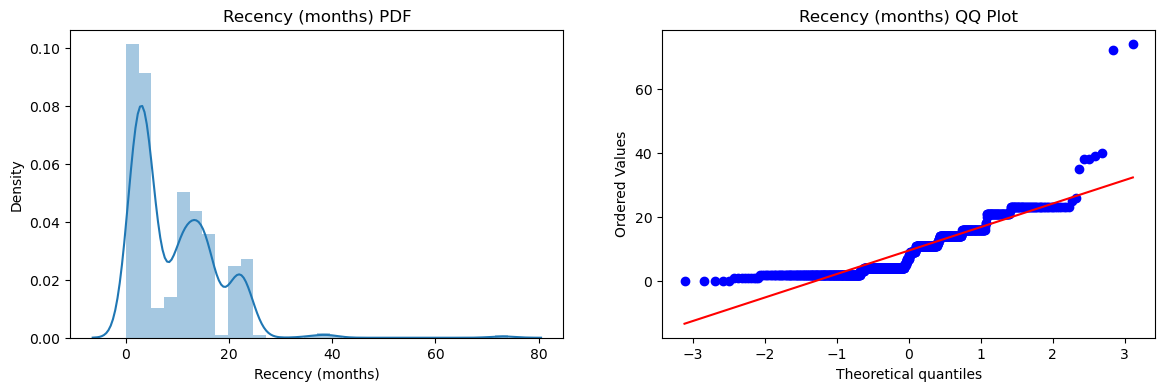

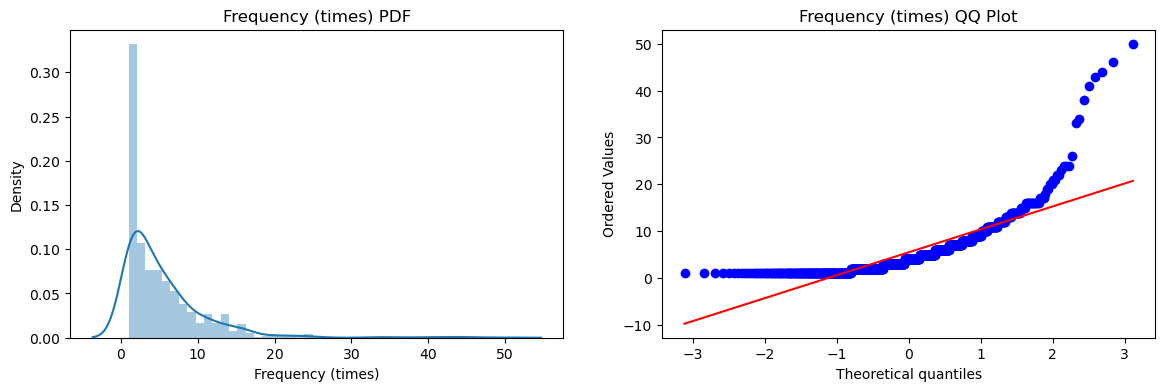

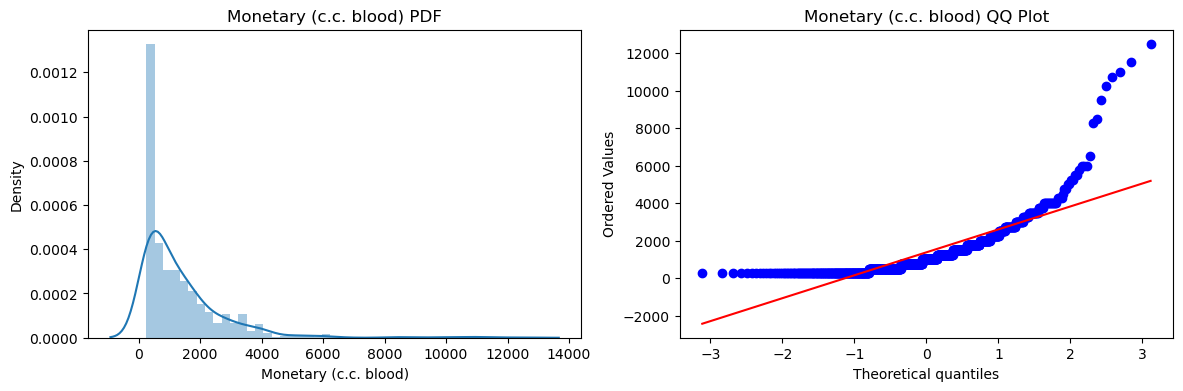

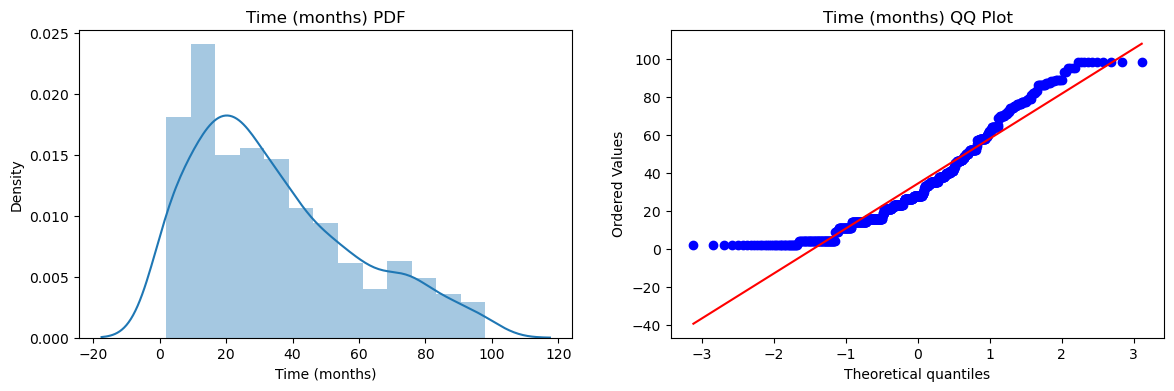

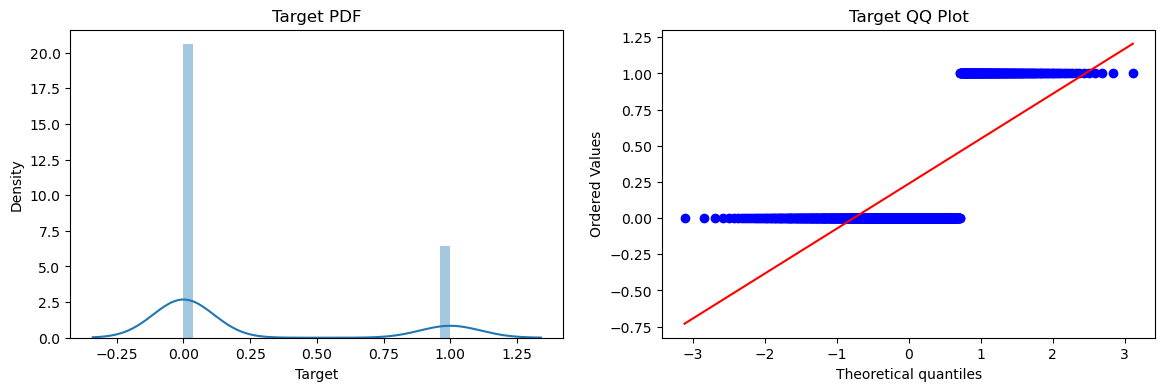

In [11]:
# Function to plot PDF and QQ Plot for a given column
def plot_distribution(column_name):
    # Set up the figure with two subplots
    plt.figure(figsize=(14, 4))

    # PDF subplot
    plt.subplot(121)
    sns.distplot(data[column_name])
    plt.title(f'{column_name} PDF')

    # QQ Plot subplot
    plt.subplot(122)
    stats.probplot(data[column_name], dist="norm", plot=plt)
    plt.title(f'{column_name} QQ Plot')

# Plot for 'Recency (months)' column
plot_distribution('Recency (months)')

# Plot for 'Frequency (times)' column
plot_distribution('Frequency (times)')

# Plot for 'Monetary (c.c. blood)' column
plot_distribution('Monetary (c.c. blood)')

# Plot for 'Time (months)' column
plot_distribution('Time (months)')

# Plot for 'Target' column
plot_distribution('Target')

# Display all the plots
plt.show()


<Figure size 1500x1200 with 0 Axes>

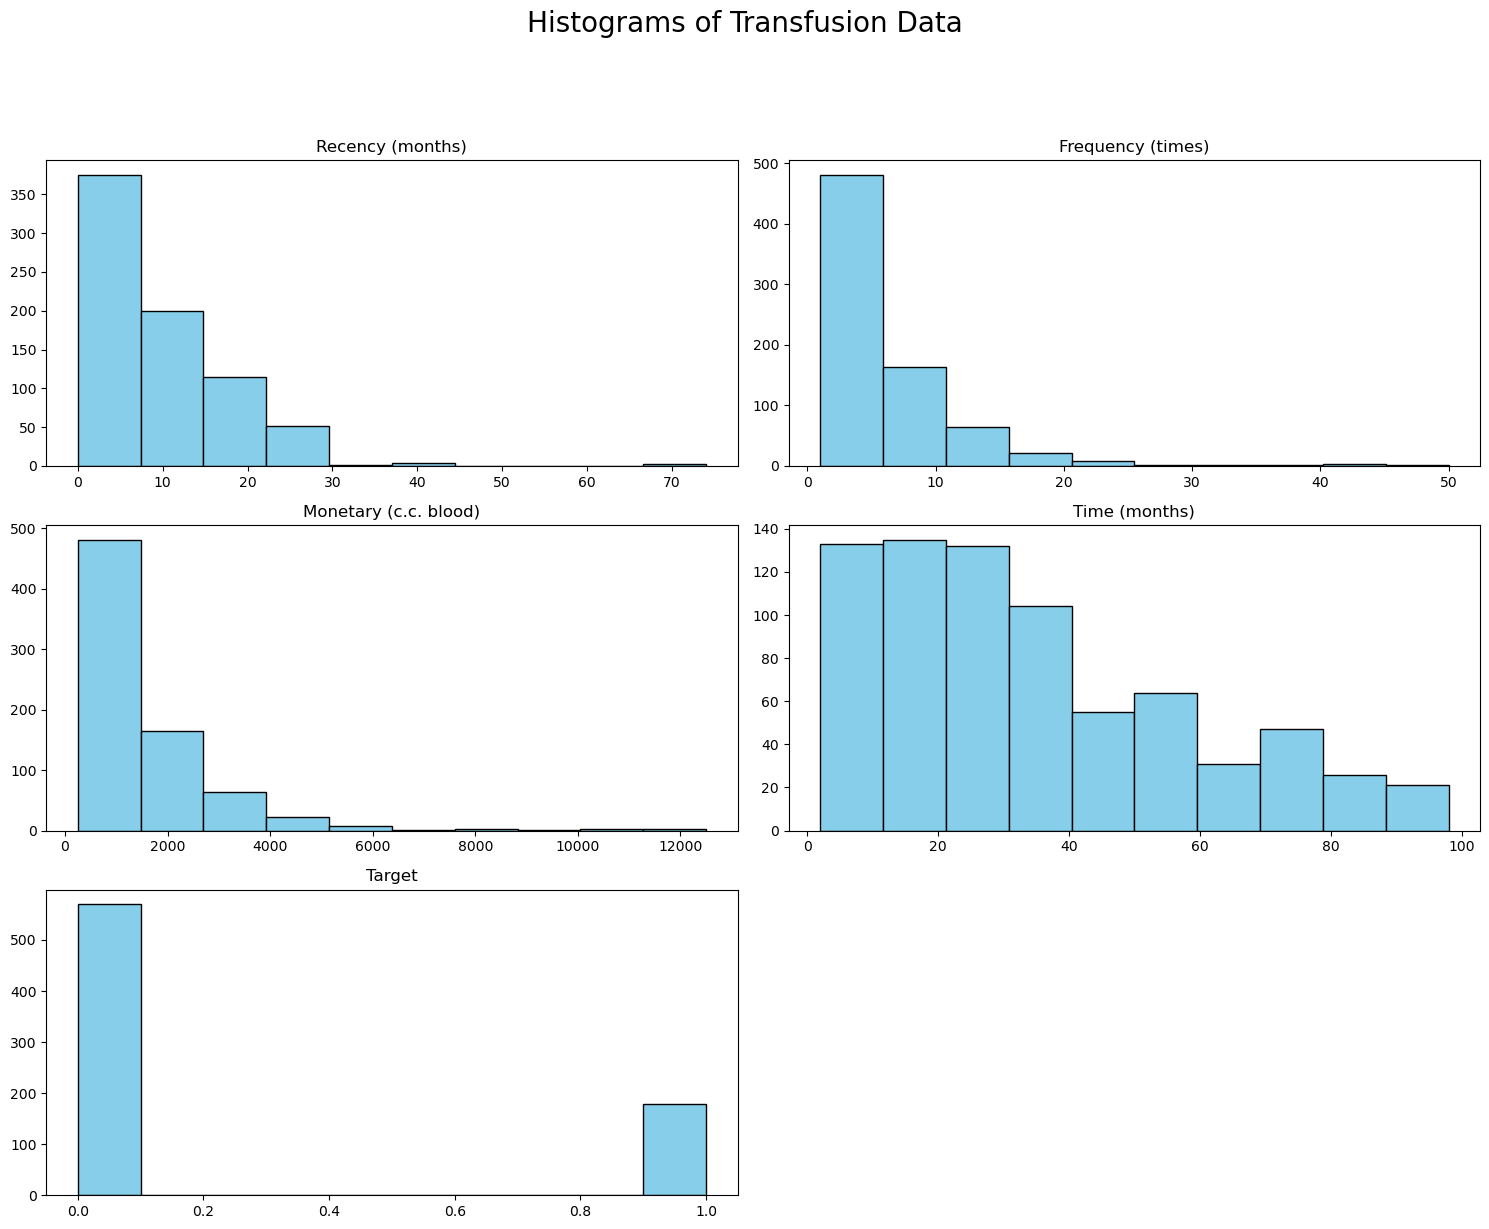

In [12]:
# 'data' is our DataFrame
plt.figure(figsize=(15, 12))

data.hist(figsize=(15,12), 
          grid=False, 
          color='skyblue', 
          edgecolor='black')

# Add titles and labels
plt.suptitle('Histograms of Transfusion Data', x=0.5, y=1.02, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for titles

# Display the plot
plt.show()

# Splitting transfusion into train and test datasets
<p>We'll now use <code>train_test_split()</code> method to split <code>transfusion</code> DataFrame.</p>
<p>Target incidence informed us that in our dataset <code>0</code>s appear 76% of the time. We want to keep the same structure in train and test datasets, i.e., both datasets must have 0 target incidence of 76%. This is very easy to do using the <code>train_test_split()</code> method from the <code>scikit learn</code> library - all we need to do is specify the <code>stratify</code> parameter. In our case, we'll stratify on the <code>target</code> column.</p>

In [13]:
# Import train_test_split method
X = data.drop(columns=['Target'])
y = data[['Target']]

# X_train, X_test, y_train and y_test datasets,
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42, 
                                                    stratify=y)
# Applying Scaling
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

# Selecting model using TPOT
<p><a href="https://github.com/EpistasisLab/tpot">TPOT</a> is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.</p>
<p><img src="https://assets.datacamp.com/production/project_646/img/tpot-ml-pipeline.png" alt="TPOT Machine Learning Pipeline"></p>
<p>TPOT will automatically explore hundreds of possible pipelines to find the best one for our dataset. Note, the outcome of this search will be a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">scikit-learn pipeline</a>, meaning it will include any pre-processing steps as well as the model.</p>
<p>We are using TPOT to help us zero in on one model that we can then explore and optimize further.</p>

In [14]:
# Instantiate TPOTClassifier
tpot = TPOTClassifier(generations=10,
                        population_size=20,
                        verbosity=2,
                        scoring='accuracy',  # Change scoring metric to accuracy
                        random_state=42,
                        disable_update_check=True,
                        config_dict='TPOT light',
                        early_stop=5)


tpot.fit(X_train_trf, y_train)

# Accuracy score for tpot model
tpot_accuracy = accuracy_score(y_test, tpot.predict(X_test_trf))
print(f'\nAccuracy score: {tpot_accuracy:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7843277310924369

Generation 2 - Current best internal CV score: 0.7843277310924369

Generation 3 - Current best internal CV score: 0.7843277310924369

Generation 4 - Current best internal CV score: 0.7876610644257702

Generation 5 - Current best internal CV score: 0.7876610644257702

Generation 6 - Current best internal CV score: 0.7876610644257702

Generation 7 - Current best internal CV score: 0.7876610644257702

Generation 8 - Current best internal CV score: 0.7876610644257702

Generation 9 - Current best internal CV score: 0.7876610644257702

Generation 10 - Current best internal CV score: 0.7876610644257702

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=5, min_samples_leaf=20, min_samples_split=4)

Accuracy score: 0.7867

Best pipeline steps:
1. DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=4,
                       random_state=42)


In [15]:
clf = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=5, 
                             min_samples_leaf=15,
                             min_samples_split=16, 
                             random_state=42)
clf.fit(X_train_trf,y_train)

y_test['Pred']= clf.predict(X_test_trf)

print(classification_report(y_test['Target'], y_test['Pred']))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       114
           1       0.64      0.44      0.52        36

    accuracy                           0.81       150
   macro avg       0.74      0.68      0.70       150
weighted avg       0.79      0.81      0.79       150



In [18]:
# Prediction on the training set
Y_train_pred = clf.predict(X_train_trf)

# Training accuracy for Dtree
train_accuracy = accuracy_score(y_train, Y_train_pred)
print("Training Accuracy (Decision Tree): {:.2f}%".format(train_accuracy * 100))

Training Accuracy (Decision Tree): 81.10%


# Conclusion
<p>The demand for blood fluctuates throughout the year. As one <a href="https://www.kjrh.com/news/local-news/red-cross-in-blood-donation-crisis">prominent</a> example, blood donations slow down during busy holiday seasons. An accurate forecast for the future supply of blood allows for an appropriate action to be taken ahead of time and therefore saving more lives.</p>
<p>In this notebook, we explored automatic model selection using TPOT and Accuracy score we got was 0.81. This is better than simply choosing <code>0</code> all the time (the target incidence suggests that such a model would have 76% success rate). We then normalized our training data and improved the Accuracy score by 2%. In the field of machine learning, even small improvements in accuracy can be important, depending on the purpose.</p>
<p>Another benefit of using Decision Tree Model  is that it is interpretable. We can analyze how much of the variance in the response variable (<code>target</code>) can be explained by other variables in our dataset.</p>